# <center> Trabajo práctico 0: Algoritmo de<br>Maximización de la Esperanza
## <center> Ph. D. Saúl Calderón Ramírez<br>Instituto Tecnológico de Costa Rica,<br>Escuela de Computación<br>PAttern Recongition and MAchine Learning Group (PARMA-Group)<br>15 de enero de 2024

**Fecha de entrega:** Lunes 5 de Febrero. \
**Entrega:** Un archivo .zip con el código fuente LaTeX o Lyx, el pdf, y un jupyter en Pytorch, debidamente documentado, con una función definida por ejercicio. A través del TEC-digital. \
**Modo de trabajo:** Grupos de 2 a 3 personas.

### **1. (80 puntos) Algoritmo de Maximización de la Esperanza con datos artificiales (modelo Gaussiano)**

A continuación, implemente el algoritmo de maximización de la esperanza (descrito en el material del curso), usando la definición y descripción de las siguientes funciones como base:

1. (15 puntos) Implemente la función generate_data la cual reciba la cantidad de observaciones unidimensionales total a generar N, y los parámetros
correspondientes a K = 2 funciones de densidad Gaussianas. Genere los datos siguiendo tales distribuciones, y retorne tal matriz de datos X 2 RN×1.

    a) Grafique los datos usando un scatter plot junto con las gráficas de los histogramas de los datos y las funciones de densidad de probabilidad Gaussianas usando los parámetros para inicializar los datos, en la misma figura (gráfico). Escoja 3 conjuntos de parámetros para mostrar los 3 dataset resultantes.

In [1]:
# Imports
import torch
from torch.distributions.normal import Normal
import matplotlib.pyplot as plt
import numpy as np
import time

In [2]:

def generate_data(N,U1,s1,U2,s2):
    """
    Funsión para generar datasets
    
    Inputs: N  : Número de muestreos 
            U1 : Miu de la funsión normal 1
            s1 : gigma de la funsión normal 1
            U2 : Miu de la funsión normal 2
            s2 : gigma de la funsión normal 2
            
    Outputs : datset : Tensor que contiene los muestreos de las dos funciones normales generadas
              normal_dist_1 : Funsión Normal generada 1
              normal_dist_2 : Funsión Normal generada 2
    """
    ## Se crean dos distribuciones normales a partir de los parametros introducidos
    normal_dist_1 = Normal(U1,s1)
    normal_dist_2 = Normal(U2,s2)
    ## Se realizar el sampleo de las distribuciones cada una por N/2
    gaussian_sample_1 = normal_dist_1.sample((N//2,1)).squeeze()
    gaussian_sample_2 = normal_dist_2.sample((N//2,1)).squeeze()
    ## Se concatenan los muestreos para formar el dataset
    dataset = torch.cat((gaussian_sample_1,gaussian_sample_2))
    
    return dataset,normal_dist_1,normal_dist_2


In [3]:

def plot_dataset( dataset, normal_d1, normal_d2, 
                 hist_x_label, hist_y_label, hist_title, 
                 scat_x_label, scat_y_label, scat_title,
                 pdf_x_label, pdf_y_label, pdf_title):
    """
    Funsión para generar datasets plots
    
    Inputs: datset : Tensor que contiene los muestreos de las dos funciones normales generadas
            normal_d1 : Funsión Normal generada 1
            normal_d2 : Funsión Normal generada 2
            hist_x_label : Nombre del Eje X de Histograma
            hist_y_label : Nombre del Eje Y de Histograma
            hist_title : Título de histogratama
            scat_x_label : Nombre del Eje X de Scatter plot
            scat_y_label : Nombre del Eje Y de Scatter plot
            scat_title : Titulo de scatter plot
            pdf_x_label : Nombre del Eje X de PDF line
            pdf_y_label : Nombre del Eje Y de PDF line
            pdf_title : Tpitulo de gráfico de líneas
            
    Outputs : Imprime una fila con las gráficas de histograma, 1D scatterplot y PDF lines
    """
    ## Creación del histograma
    max_val = np.max(dataset.tolist())
    min_val = np.min(dataset.tolist())
    histogram_gaussian, bins_gaussian = np.histogram(dataset.numpy(), bins = 50, range = (min_val, max_val))

    ## Creación de plot
    fig,((ax1,ax2,ax3)) = plt.subplots(nrows=1, ncols=3)

    ## Se genera el plot del histograma
    width = np.max(bins_gaussian) / bins_gaussian.shape[0]
    ax1.bar(bins_gaussian[1:].tolist(), histogram_gaussian.tolist(), width = width,edgecolor='white')
    ax1.grid(color='gray', linestyle='dashed')

    ## Se crean los labels del las barras del histograma y se añaden el título y nombre de ejes
    bars = ax1.patches
    labels = histogram_gaussian.tolist()
    for bar, label in zip(bars, labels): 
        height = bar.get_height() 
        ax1.text(bar.get_x() + bar.get_width() / 2, height+0.01, label, ha='center', va='bottom')  
    ax1.set_xlabel(hist_x_label)
    ax1.set_ylabel(hist_y_label)
    ax1.set_title(hist_title)

    ## Se crea scatter plot como puntos distribuidos en el eje x y y=0
    yscatter = torch.zeros(dataset.shape[0])
    ax2.scatter(dataset, yscatter, alpha=0.5)
    ax2.set_xlabel(scat_x_label)
    ax2.set_ylabel(scat_y_label)
    ax2.set_title(scat_title)

    ## Se generan los puntos para los gráficos de líneas de los PDFs
    xpoints = np.arange(min_val, max_val, (max_val - min_val)/1000)
    y1 = [torch.exp(normal_d1.log_prob(torch.tensor(a))) for a in xpoints]
    y2 = [torch.exp(normal_d2.log_prob(torch.tensor(a))) for a in xpoints]
    
    ax3.plot( xpoints,y1, label='Dist_1')
    ax3.plot( xpoints,y2, label='Dist_2')
    ax3.legend()
    ax3.grid(color='gray', linestyle='dashed')
    ax3.set_xlabel(pdf_x_label)
    ax3.set_ylabel(pdf_y_label)
    ax3.set_title(pdf_title)
    
    fig.set_figwidth(20)
    plt.show()

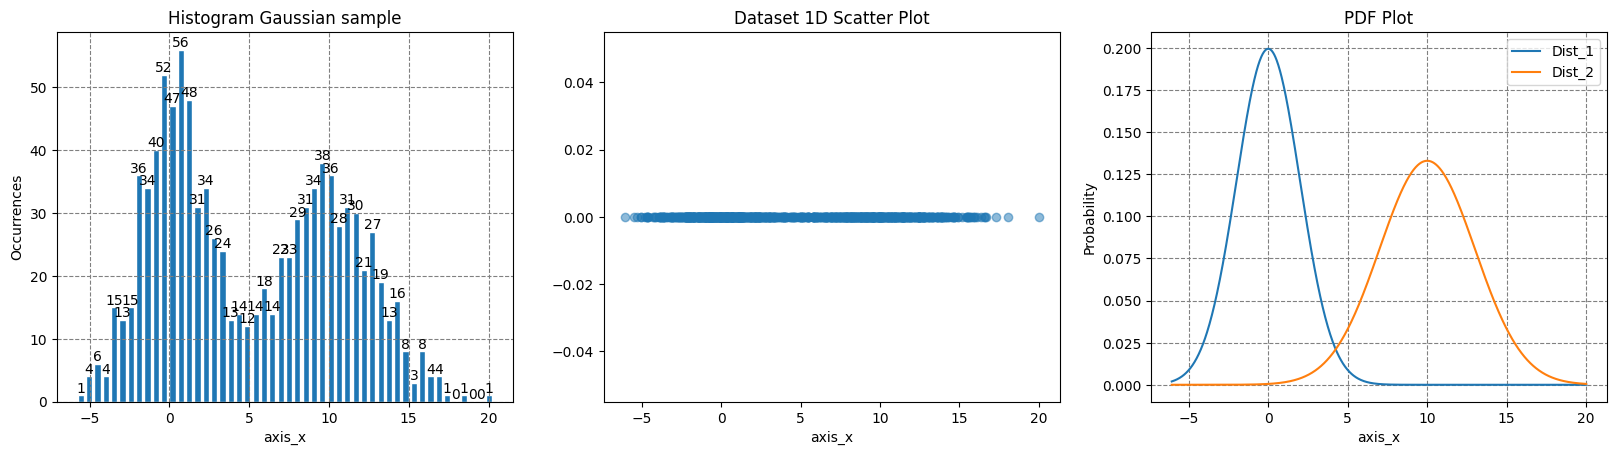

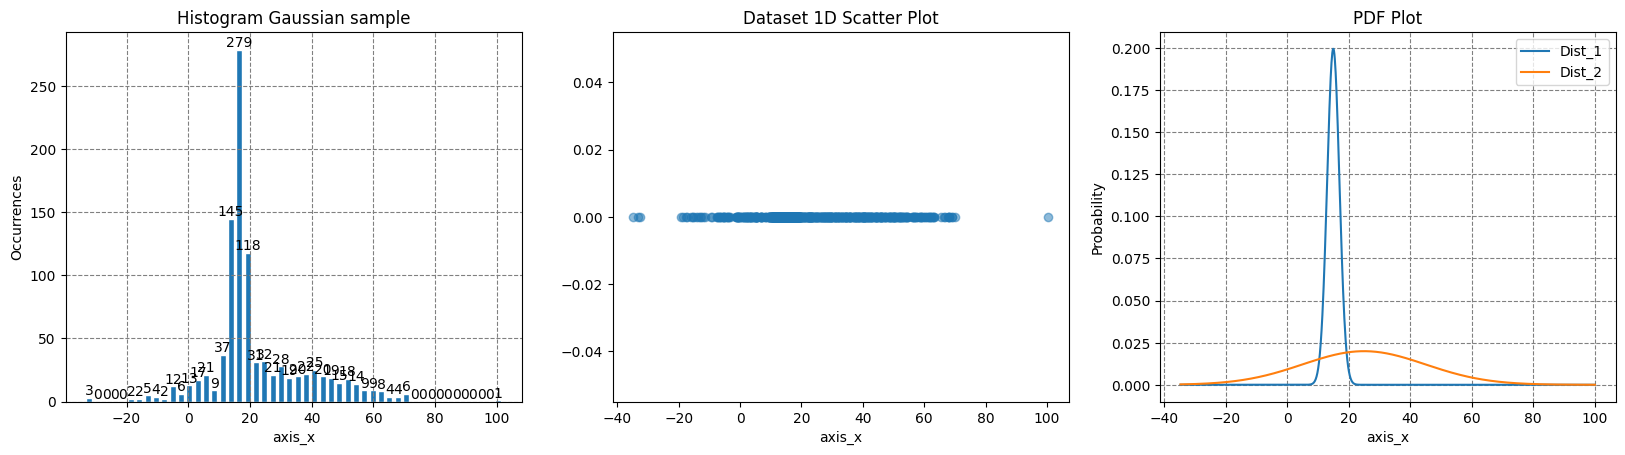

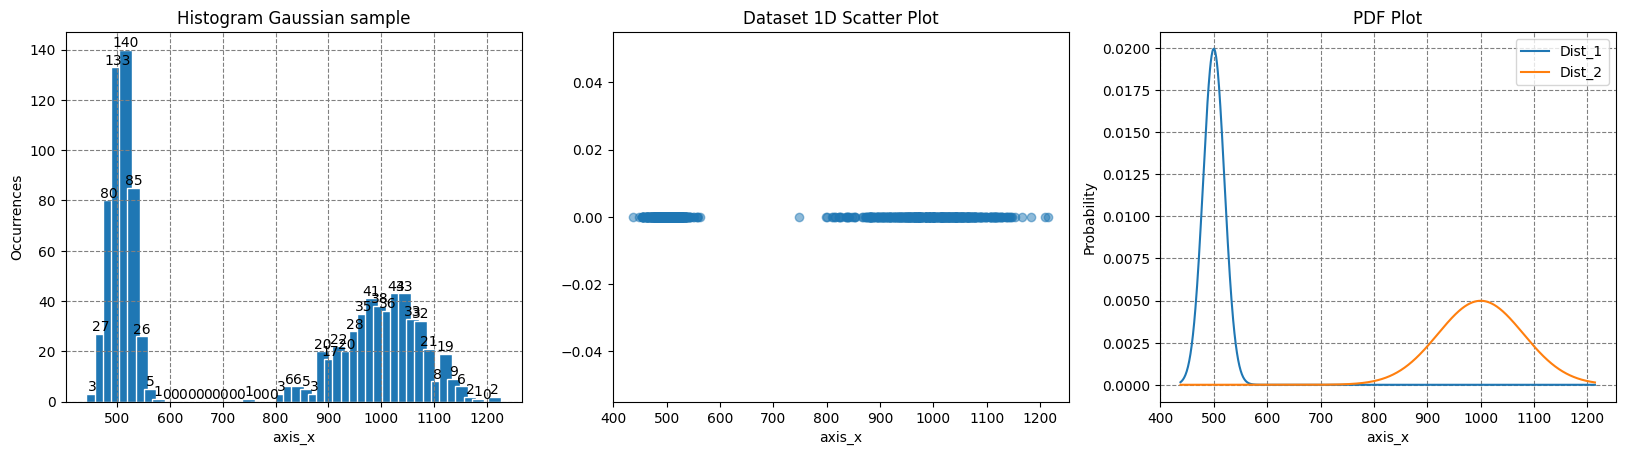

In [4]:
## Números de muestras total
N = 1000

## Array de valores de Mu para generar los datasets dataset 1 [U1 U2] dataset 2 [U1 U2]...
aMiu   = [[0.0, 10.0],[15.0, 25.0],[500.0, 1000.0]]
## Array de valores de Sigma para generar los datasets dataset 1 [S1 S2] dataset 2 [S1 S2]...
aSigma = [[2.0, 3.0 ],[2.0,  20.0],[20.0,  80.0  ]]
Dataset_list = []

## Loop para generar Datasets
for i in range(3):
    Miu1   = torch.tensor([aMiu[i][0]])
    Sigma1 = torch.tensor([aSigma[i][0]])
    Miu2   = torch.tensor([aMiu[i][1]])
    Sigma2 = torch.tensor([aSigma[i][1]])
    ds, nd1, nd2 = generate_data(N,Miu1,Sigma1,Miu2,Sigma2)
    Dataset_list.append(ds)
    plot_dataset(ds, nd1, nd2,
            "axis_x", "Occurrences", "Histogram Gaussian sample",
            "axis_x", "", "Dataset 1D Scatter Plot",
            "axis_x", "Probability", "PDF Plot")

2. (5 puntos) Implemente la función init_random_parameters la cual genere una matriz de P 2 RK×2 dimensiones, con los parámetros de las funciones de densidad Gaussiana generados completamente al azar.

    a) Muestre un pantallazo donde verifique su funcionamiento correcto con los comentarios asociados.

In [5]:

def init_random_parameters(op_range):
    """
    Funsión para generar parámetros random para inicilizar el algoritmo
    
    Inputs: op_range  : Rango de operación para delimitar los valores random
    
    Outputs: Tensor que contiene los valores random dentro del rango de operación
    """
    return (op_range[0] - op_range[1])*torch.rand(2, 2) + op_range[1]

## Prueba unitaria
operation_range = [0,100]
init_random_parameters(operation_range)

tensor([[38.7619,  4.0637],
        [78.8293, 82.8254]])

3. (20 puntos) Implemente la función calculate_likelihood_gaussian_observation(x_n, mu_k, sigma_k) la cual calcule la verosimilitud de una observación específica xn, para una función de densidad Gaussiana con parámetros µk y σk. Realice la corrección pertinente al calculo de la función de verosimilitud
para evitar el problema de under flow.

    a) Diseñe y ejecute una prueba unitaria donde verifique su funcionamiento correcto con los comentarios asociados.

In [6]:

def calculate_likelihood_gaussian_observation(x_n, mu_k, sigma_k):
    """
    Funsión determinar la verosimilitud de un valor x a una PDF gaussiana
    
    Inputs: x_n  : Rango de operación para delimitar los valores random
            mu_k : valor de Mu para generar la PDF
            sigma_k : valor de sigma para generar la PDF
            
    Outputs: lkht : verosimilitud resultante
    """
    normal_dist = Normal(mu_k,sigma_k)
    lkht = normal_dist.log_prob(x_n)
    return lkht


## Prueba Unitaria
x_n, mu_k, sigma_k = torch.tensor(1), torch.tensor(1), torch.tensor(0.000001)
print(calculate_likelihood_gaussian_observation(x_n, mu_k, sigma_k))

x_n, mu_k, sigma_k = torch.tensor(5), torch.tensor(0), torch.tensor(2)
print(calculate_likelihood_gaussian_observation(x_n, mu_k, sigma_k))

tensor(12.8966)
tensor(-4.7371)


4. (10 puntos) Implemente la función calculate_membership_dataset(X_dataset, Parameters_matrix), la cual, usando la matriz de parámetros P y la función
anteriormente implementada calculate_likelihood_gaussian_observation, defina por cada observación xn 2 X la pertenencia o membresía a cada cluster k = 1,...K, en una matriz binaria M per R^N×K. Retorne tal matriz de membresía M.

    a) Diseñe y ejecute una prueba unitaria donde verifique su funcionamiento correcto con los comentarios asociados.

In [7]:

def calculate_membership_dataset(X_dataset, Parameters_matrix):
    """
    Funsión determinar la membresía de un conjunto de datos a uno de dos PDFs
    
    Inputs: X_dataset  : Dataset a evaluar
            Parameters_matrix : parámetros para generar ambas PDFs
            
    Outputs: XMemb : Matriz de membresía de tamaño NX2
    """
    ## Inicialización de las variables
    XMemb = []
    Mu1 = Parameters_matrix[0][0]
    Si1 = Parameters_matrix[0][1]
    Mu2 = Parameters_matrix[1][0]
    Si2 = Parameters_matrix[1][1]
    ## Loop para asociar cada valor en el dataset al PDF al cual tenga la mayor verosimilitud
    for x in X_dataset:
        lkhd_1 = calculate_likelihood_gaussian_observation(x, Mu1, Si1)
        lkhd_2 = calculate_likelihood_gaussian_observation(x, Mu2, Si2)
        if lkhd_1 >= lkhd_2:
            XMemb.append([1,0])
        else:
            XMemb.append([0,1])
    return XMemb


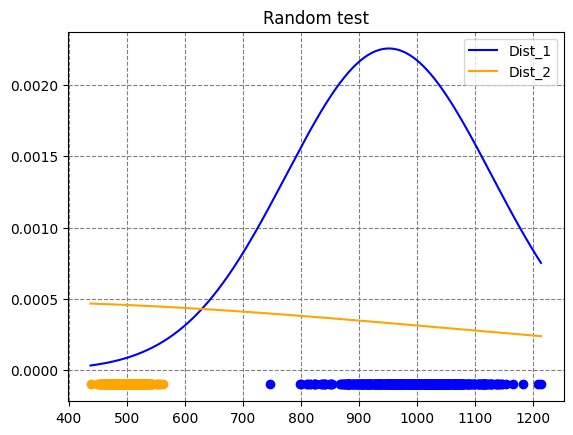

In [8]:

# Import para refrescar la celda de impresión
from IPython.display import clear_output

def Memb_plot(ds, Memb, par_m, title):
    """
    Funsión visualizar la funcionalidad de la asociación de valores
    
    Inputs: ds  : Dataset para graficar en 1D
            Memb : Matríz de membresía
            par_m : Matríz de parámetros para generar las PDF
            title : Título de la gráfica
    Outputs: Plot mostrando dos funciones normales y el dataset con coloración de acuerdo con su membresía
    """
    ## Se separan el data set en dos listas de acuerdo a su membresía
    xmemb_1 = []
    xmemb_2 = []
    for indx, xi in enumerate(ds):
        if M[indx][0] == 1: xmemb_1.append(xi)
        else:               xmemb_2.append(xi)
    
    ## Valore extremos del dataset usados en la graficación
    max_val = np.max(ds.tolist())
    min_val = np.min(ds.tolist())
    ## Generación de las PDF gaussianas
    normal_dist1 = Normal(par_m[0][0],par_m[0][1])
    normal_dist2 = Normal(par_m[1][0],par_m[1][1])
    ## Creación del gráfico
    fig,ax = plt.subplots(nrows=1, ncols=1)
    ## Se crean 1000 puntos en el eje x entre los valores extremos del dataset
    xpoints = np.arange(min_val, max_val, (max_val - min_val)/1000)
    ## Se generan los puntos del eje y para las PDFs
    y1 = [torch.exp(normal_dist1.log_prob(torch.tensor(a))) for a in xpoints]
    y2 = [torch.exp(normal_dist2.log_prob(torch.tensor(a))) for a in xpoints]
    ## Se define el eje y para los puntos del dataset en -0.0001 (1D plot)
    yp1 = torch.zeros(len(xmemb_1)) - 0.0001
    yp2 = torch.zeros(len(xmemb_2)) - 0.0001
    ## Se generan las PDFs en el gráfico
    ax.plot( xpoints,y1, label='Dist_1',color='blue')
    ax.plot( xpoints,y2, label='Dist_2',color='orange')
    ## Se generan los puntos del dataset en el gráfico, si el conjunto de membresía es está vacío se ignora
    if len(xmemb_1) > 0: ax.plot(xmemb_1, yp1, "o",color='blue')
    if len(xmemb_2) > 0: ax.plot(xmemb_2, yp2, "o",color='orange')
    ax.grid(color='gray', linestyle='dashed')
    ax.legend()
    ax.set_title(title)
    plt.show()


## Se utiliza la función init_random_parameters para hacer una prueba 
## random de la asociación de punto a una determinada membresía
for k in range(10):
    par_m = init_random_parameters([0,1000])
    M =  calculate_membership_dataset(ds, par_m)
    Memb_plot(ds, M, par_m, title='Random test')
    clear_output(wait=True)
    time.sleep(1)
    

5. (10 puntos) Implemente la función recalculate_parameters(X_dataset, Membership_data), la cual recalcule los parámetros de las funciones de densidad Gaussianas representandas en la matriz P, de acuerdo a lo representado en la matriz de membresía M.
   
    a) Use las funciones mean y std de pytorch para ello. Intente prescindir al máximo de estructuras de repetición tipo for

In [9]:

def recalculate_parameters(X_dataset, Membership_data):
    """
    Funsión para recalcular los parámetros de las PDFs basados en la matríz de membresía
    
    Inputs: X_dataset : Dataset
            Membership_data : Matríz de membresía
            
    Outputs: ParamT : Nueva matríz de parámetros para generar las PDF
    """
    ## Se separan el data set en dos listas de acuerdo a su membresía
    xmemb_1 = []
    xmemb_2 = []
    for indx, xi in enumerate(X_dataset):
        if Membership_data[indx][0] == 1: xmemb_1.append(xi)
        else:               xmemb_2.append(xi)
    xmemb_1 = torch.FloatTensor(xmemb_1)
    xmemb_2 = torch.FloatTensor(xmemb_2)
    ## Se inicializa el tensor de salida
    ParamT=torch.zeros(2,2)
    ## Se calcula los Mu y Sigma usando el grupo 1 separado del dataset
    if len(xmemb_1) > 0:
        ParamT[0][0] = xmemb_1.mean()  # Grupo 1 Esperanza
        ParamT[0][1] = xmemb_1.std()   # Grupo 1 Sigma
    ## En caso de que el dataset esté vacío se generarán valores ramdon entre (Mu-sigma) y (Mu+sigma) del grupo opuesto
    else:
        rmin = abs(xmemb_2.mean()-xmemb_2.std())
        rmax = abs(xmemb_2.mean()+xmemb_2.std())
        ParamT[0] = init_random_parameters([rmin,rmax])[0]
    ## Se calcula los Mu y Sigma usando el grupo 2 separado del dataset
    if len(xmemb_2) > 0:
        ParamT[1][0] = xmemb_2.mean()  # Grupo 2 Esperanza
        ParamT[1][1] = xmemb_2.std()   # Grupo 2 Sigma
    ## En caso de que el dataset esté vacío se generarán valores ramdon entre (Mu-sigma) y (Mu+sigma) del grupo opuesto
    else:
        rmin = abs(xmemb_1.mean()-xmemb_1.std())
        rmax = abs(xmemb_1.mean()+xmemb_1.std())
        ParamT[1] = init_random_parameters([rmin,rmax])[0]
    
    return ParamT


## Prueba unitaria
print(recalculate_parameters(ds, M))


tensor([[995.9972,  75.4561],
        [500.5205,  20.3860]])


6. (10 puntos) Ejecute 5 corridas diferentes del algoritmo, donde por cada una documente los parámetros a los que se arribó, junto con los parámetros iniciales (describalo en una tabla). Hagalo para los 3 conjuntos de
datos generados anteriormente.
    
    a) Grafique las funciones de densidad de probabilidad a las que convergió el algoritmo. Puede graficar también las funciones de densidad obtenidas en 2 o 3 pasos intermedios. Presente una tabla de gráficas donde en cada entrada se identifique el número de iteración ylos parámetros iniciales. \
    b) Comente los resultados.

parameters:  tensor([[500.5205,  20.3860],
        [995.9972,  75.4561]])


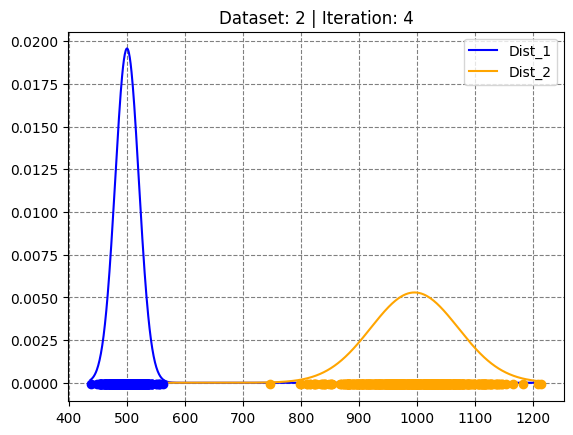

In [10]:

## Cantidad de iteraciones
P = 5

## Loop para probar el algoritmo de clustering en los 3 datasets generados
for dis_item in range(3):
    ## Se inicializa con parámetros random
    par_m = init_random_parameters([0,1000])
    for k in range(P):
        print("parameters: ", par_m)
        ## Se calcula la membresía del dataset
        M = calculate_membership_dataset(Dataset_list[dis_item], par_m)
        ## Se grafica la asociación de datos del dataset
        Memb_plot(Dataset_list[dis_item], M, par_m, title='Dataset: '+str(dis_item)+' | Iteration: '+str(k))
        ## Se recalculan los parámetros basado en la membresía para la siguiente iteración 
        par_m = recalculate_parameters(Dataset_list[dis_item], M)
        clear_output(wait=True)
        time.sleep(2)

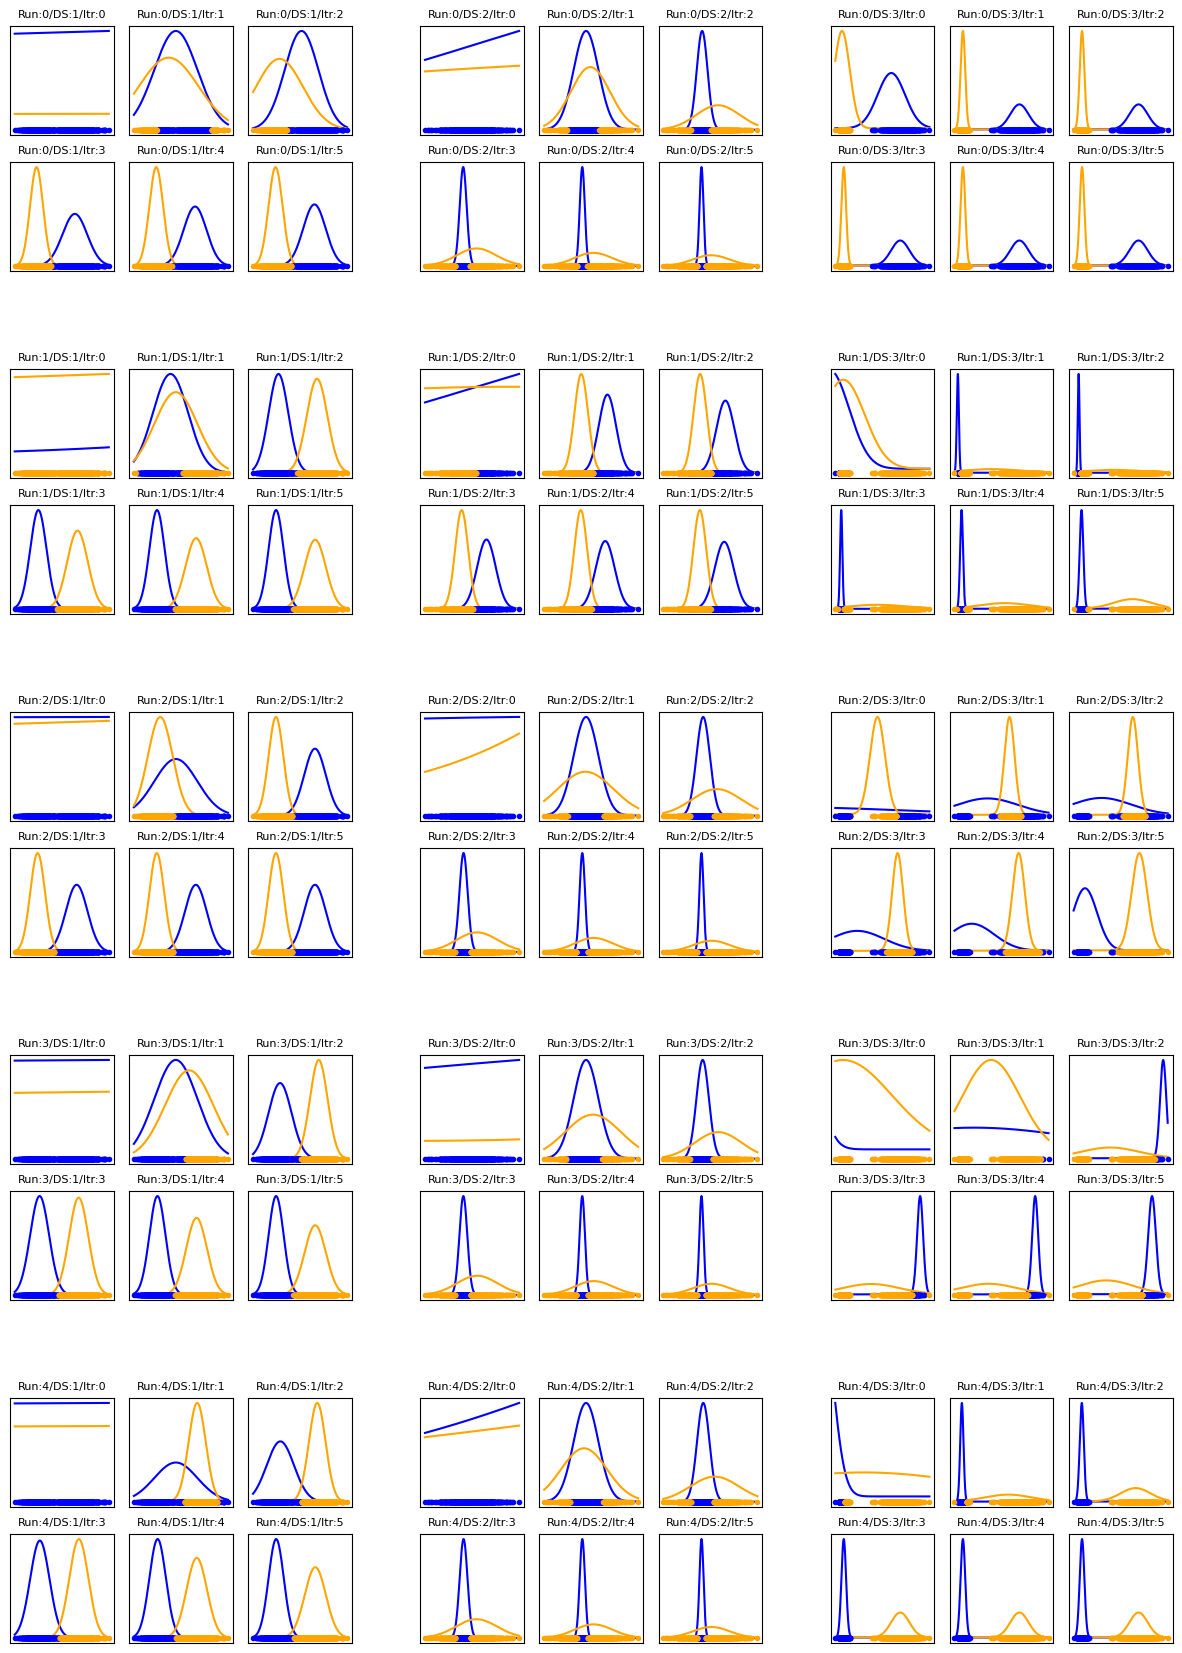

In [32]:

## Se inicializa la plantilla para las gráficas
fig = plt.figure(figsize=(15, 21))
outer_grid = fig.add_gridspec(5, 3, wspace=0.2, hspace=0.4)

## Loop para generar los gráficos para la plantilla
for a in range(5):
    for b in range(3):
        # gridspec inside gridspec
        inner_grid = outer_grid[a, b].subgridspec(2, 3, wspace=0.15, hspace=0.25)
        axs = inner_grid.subplots()  # Create all subplots for the inner grid.
        ## Se inicializa con parámetros random
        par_m = init_random_parameters([0,1000])
        for (c, d), ax in np.ndenumerate(axs):
            k=3*c+d  #iteración
            ## Se calcula la membresía del dataset
            M = calculate_membership_dataset(Dataset_list[b], par_m)
            ## Se separan el data set en dos listas de acuerdo a su membresía
            xmemb_1 = []
            xmemb_2 = []
            for indx, xi in enumerate(Dataset_list[b]):
                if M[indx][0] == 1: xmemb_1.append(xi)
                else:               xmemb_2.append(xi)
            ## Valore extremos del dataset usados en la graficación
            max_val = np.max(Dataset_list[b].tolist())
            min_val = np.min(Dataset_list[b].tolist())
            ## Generación de las PDF gaussianas
            normal_dist1 = Normal(par_m[0][0],par_m[0][1])
            normal_dist2 = Normal(par_m[1][0],par_m[1][1])
            ## Se crean 1000 puntos en el eje x entre los valores extremos del dataset
            xpoints = np.arange(min_val, max_val, (max_val - min_val)/1000)
            ## Se generan los puntos del eje y para las PDFs
            y1 = [torch.exp(normal_dist1.log_prob(torch.tensor(a))) for a in xpoints]
            y2 = [torch.exp(normal_dist2.log_prob(torch.tensor(a))) for a in xpoints]
            ## Se define el eje y para los puntos del dataset en -0.0001 (1D plot)
            yp1 = torch.zeros(len(xmemb_1)) - 0.0001
            yp2 = torch.zeros(len(xmemb_2)) - 0.0001
            ## Se generan los puntos del dataset en el gráfico, si el conjunto de membresía es está vacío se ignora
            ax.plot( xpoints,y1, label='Dist_1',color='blue')
            ax.plot( xpoints,y2, label='Dist_2',color='orange')
            if len(xmemb_1) > 0: ax.plot(xmemb_1, yp1, ".",color='blue')
            if len(xmemb_2) > 0: ax.plot(xmemb_2, yp2, ".",color='orange')
            ax.set(xticks=[], yticks=[])
            ax.set_title('Run:'+str(a)+'/'+'DS:'+str(b+1)+'/Itr:'+str(k), fontsize=8)
            ## Se recalculan los parámetros basado en la membresía para la siguiente iteración
            par_m = recalculate_parameters(Dataset_list[b], M)

## Loop para llenar la plantilla de gráficas
for ax in fig.get_axes():
    ss = ax.get_subplotspec()

plt.show()

7. (10 puntos) Proponga una mejor heurística para inicializar los parámetros del modelo aleatoriamente.

    a) Compruebe la mejora obtenida con el método propuesto, corriendo las pruebas del punto anterior.

In [15]:


def init_parameters_extreme_values(Dataset):
    """
    Funsión inicializar los parámetros de Mu y Sigma centrados en los valores extremos
    
    Inputs: Dataset : Dataset
            
    Outputs: Tensor de parámetros para generar las PDF
    """
    ## Cálculo de valores extremos
    mu1  = np.min(Dataset.tolist())
    mu2  = np.max(Dataset.tolist())
    sig1 = (mu2-mu1)/10 # Sigma = 10% de la diferencia de los valores extremos
    sig2 = sig1
    return torch.tensor([[mu1,sig1],[mu2,sig2]])

##  Prueba unitaria
init_parameters_extreme_values(ds)

tensor([[ 446.7558,   82.9156],
        [1275.9117,   82.9156]], dtype=torch.float64)

parameters:  tensor([[ 501.1954,   19.8245],
        [1003.6136,   77.8422]])


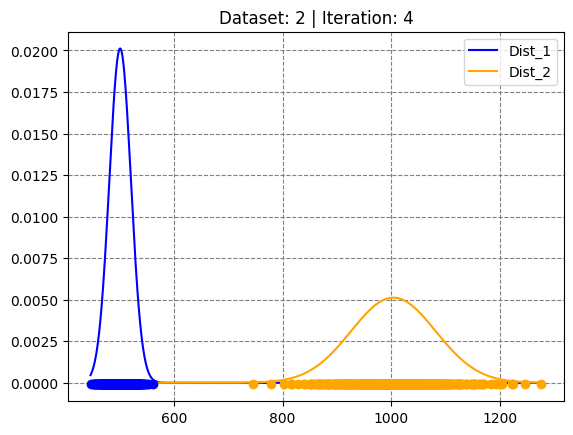

In [16]:

## Cantidad de iteraciones
P = 5

## Loop para probar el algoritmo de clustering en los 3 datasets generados
for dis_item in range(3):
    ## Se inicializa con parámetros centrado en los valores extremos
    par_m = init_parameters_extreme_values(Dataset_list[dis_item])
    for k in range(P):
        print("parameters: ", par_m)
        ## Se calcula la membresía del dataset
        M = calculate_membership_dataset(Dataset_list[dis_item], par_m)
        ## Se grafica la asociación de datos del dataset
        Memb_plot(Dataset_list[dis_item], M, par_m, title='Dataset: '+str(dis_item)+' | Iteration: '+str(k))
        ## Se recalculan los parámetros basado en la membresía para la siguiente iteración 
        par_m = recalculate_parameters(Dataset_list[dis_item], M)
        clear_output(wait=True)
        time.sleep(2)

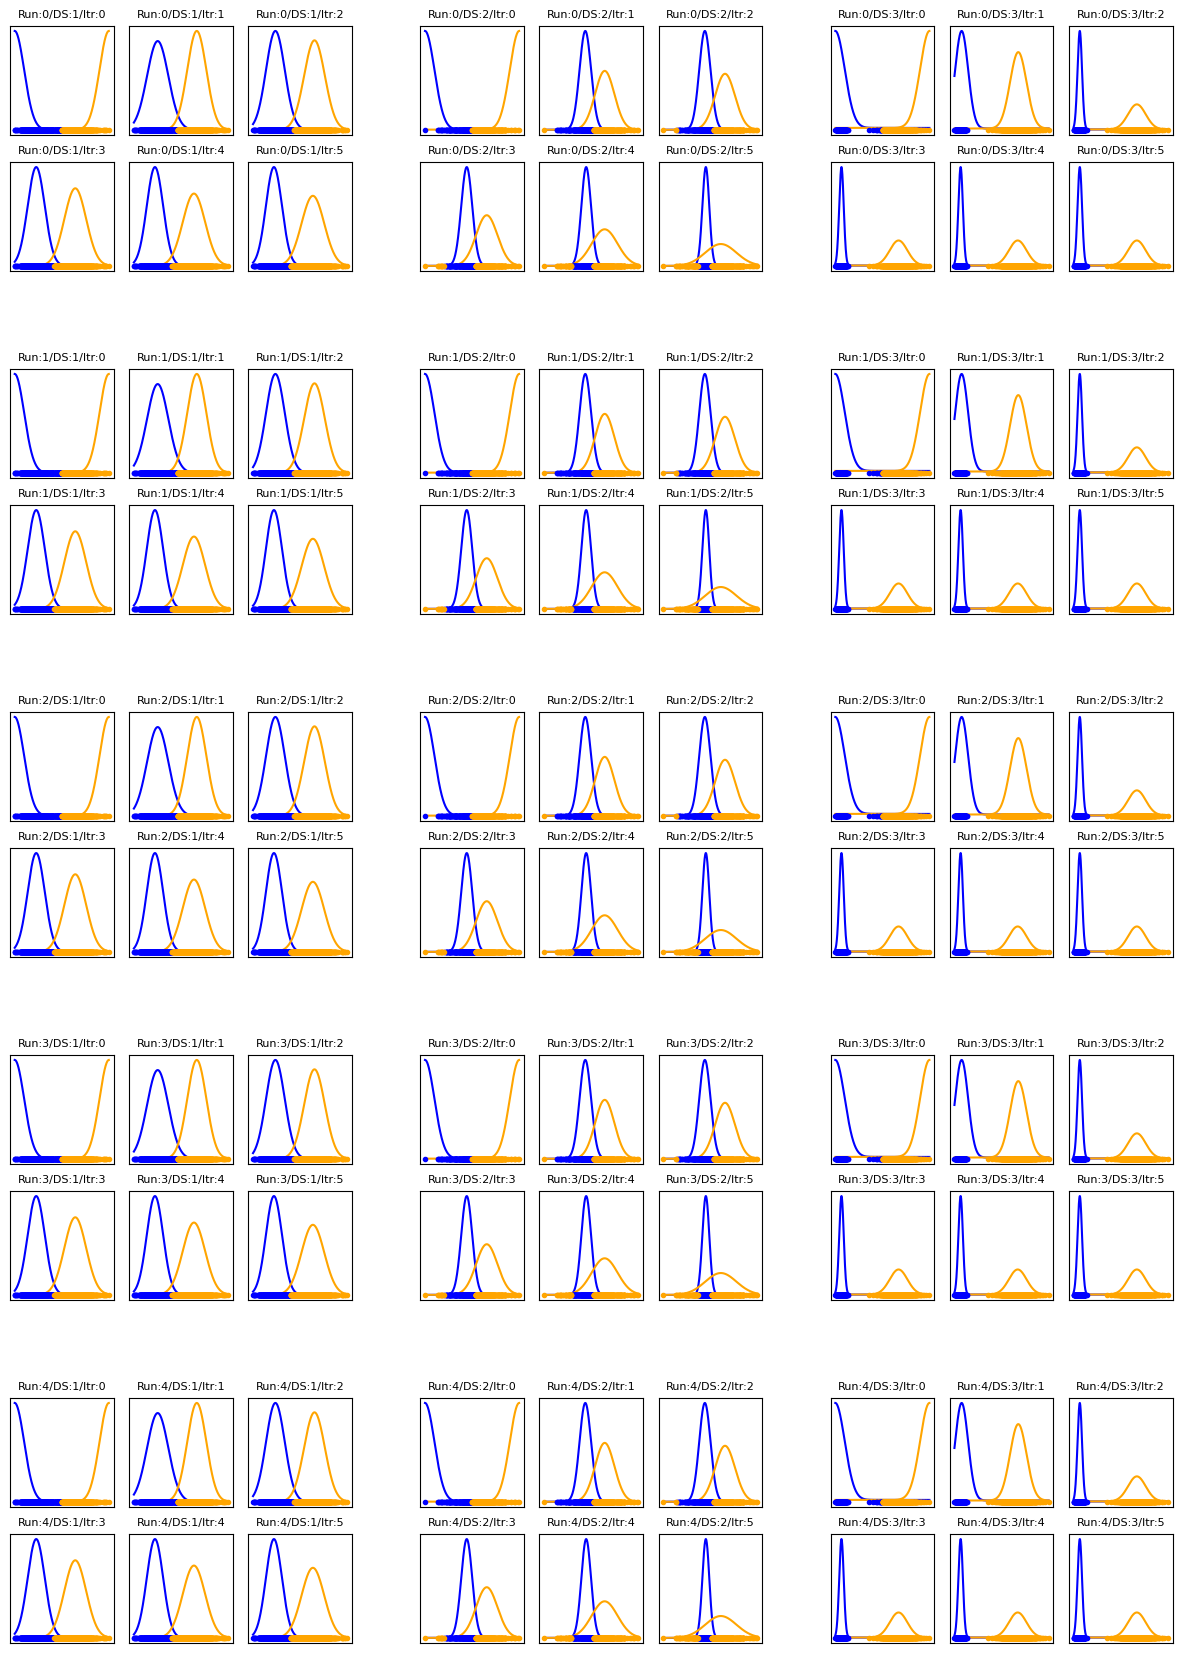

In [17]:

## Se inicializa la plantilla para las gráficas
fig = plt.figure(figsize=(15, 21))
outer_grid = fig.add_gridspec(5, 3, wspace=0.2, hspace=0.4)

## Loop para generar los gráficos para la plantilla
for a in range(5):
    for b in range(3):
        # gridspec inside gridspec
        inner_grid = outer_grid[a, b].subgridspec(2, 3, wspace=0.15, hspace=0.25)
        axs = inner_grid.subplots()  # Create all subplots for the inner grid.
        ## Se inicializa con parámetros random
        par_m = init_parameters_extreme_values(Dataset_list[b])
        for (c, d), ax in np.ndenumerate(axs):
            k=3*c+d  #iteración
            ## Se calcula la membresía del dataset
            M = calculate_membership_dataset(Dataset_list[b], par_m)
            ## Se separan el data set en dos listas de acuerdo a su membresía
            xmemb_1 = []
            xmemb_2 = []
            for indx, xi in enumerate(Dataset_list[b]):
                if M[indx][0] == 1: xmemb_1.append(xi)
                else:               xmemb_2.append(xi)
            ## Valore extremos del dataset usados en la graficación
            max_val = np.max(Dataset_list[b].tolist())
            min_val = np.min(Dataset_list[b].tolist())
            ## Generación de las PDF gaussianas
            normal_dist1 = Normal(par_m[0][0],par_m[0][1])
            normal_dist2 = Normal(par_m[1][0],par_m[1][1])
            ## Se crean 1000 puntos en el eje x entre los valores extremos del dataset
            xpoints = np.arange(min_val, max_val, (max_val - min_val)/1000)
            ## Se generan los puntos del eje y para las PDFs
            y1 = [torch.exp(normal_dist1.log_prob(torch.tensor(a))) for a in xpoints]
            y2 = [torch.exp(normal_dist2.log_prob(torch.tensor(a))) for a in xpoints]
            ## Se define el eje y para los puntos del dataset en -0.0001 (1D plot)
            yp1 = torch.zeros(len(xmemb_1)) - 0.0001
            yp2 = torch.zeros(len(xmemb_2)) - 0.0001
            ## Se generan los puntos del dataset en el gráfico, si el conjunto de membresía es está vacío se ignora
            ax.plot( xpoints,y1, label='Dist_1',color='blue')
            ax.plot( xpoints,y2, label='Dist_2',color='orange')
            if len(xmemb_1) > 0: ax.plot(xmemb_1, yp1, ".",color='blue')
            if len(xmemb_2) > 0: ax.plot(xmemb_2, yp2, ".",color='orange')
            ax.set(xticks=[], yticks=[])
            ax.set_title('Run:'+str(a)+'/'+'DS:'+str(b+1)+'/Itr:'+str(k), fontsize=8)
            ## Se recalculan los parámetros basado en la membresía para la siguiente iteración
            par_m = recalculate_parameters(Dataset_list[b], M)

## Loop para llenar la plantilla de gráficas
for ax in fig.get_axes():
    ss = ax.get_subplotspec()

plt.show()

### **2. (40 puntos) Algoritmo de Maximización de la Esperanza con datos artificiales (modelo Gamma)**

En esta sección, modificará el algoritmo de maximización de la esperanza anteriormente implementado para un modelo Gaussiano, para el modelo Gamma.

1. (20 puntos) Enliste e implemente todas las modificaciones necesarias tanto conceptualmente como en código para hacer que el algoritmo de maximización de la esperanza utilice un modelo Gamma

In [19]:
from torch.distributions.gamma import Gamma

In [20]:
def init_random_parameters_gamma(op_range):
    return (op_range[0] - op_range[1])*torch.rand(2, 2) + op_range[1]

In [21]:
def calculate_likelihood_gamma_observation(x_n, con_k, rate_k):
    gamma_dist = Gamma(con_k,rate_k)
    lkht = gamma_dist.log_prob(x_n)
    return lkht

In [22]:
def calculate_membership_dataset_gamma(X_dataset, Parameters_matrix):
    XMemb = []
    Mu1 = Parameters_matrix[0][0]
    Si1 = Parameters_matrix[0][1]
    Mu2 = Parameters_matrix[1][0]
    Si2 = Parameters_matrix[1][1]
    for x in X_dataset:
        lkhd_1 = calculate_likelihood_gaussian_observation(x, Mu1, Si1)
        lkhd_2 = calculate_likelihood_gaussian_observation(x, Mu2, Si2)
        if lkhd_1 >= lkhd_2:
            XMemb.append([1,0])
        else:
            XMemb.append([0,1])
    return XMemb

In [23]:
def recalculate_parameters_gamma(X_dataset, Membership_data):
    xmemb_1 = []
    xmemb_2 = []
    for indx, xi in enumerate(X_dataset):
        if Membership_data[indx][0] == 1: xmemb_1.append(xi)
        else:               xmemb_2.append(xi)
    xmemb_1 = torch.FloatTensor(xmemb_1)
    xmemb_2 = torch.FloatTensor(xmemb_2)
    ParamT=torch.zeros(2,2)
    if len(xmemb_1) > 0:
        ParamT[0][0] = xmemb_1.mean()  # Grupo 1 Esperanza
        ParamT[0][1] = xmemb_1.var()   # Grupo 1 Sigma
    else:
        rmin = abs(xmemb_2.mean()-xmemb_2.std())
        rmax = abs(xmemb_2.mean()+xmemb_2.std())
        ParamT[0] = init_random_parameters([rmin,rmax])[0]
    if len(xmemb_2) > 0:
        ParamT[1][0] = xmemb_2.mean()  # Grupo 2 Esperanza
        ParamT[1][1] = xmemb_2.var()   # Grupo 2 Sigma
    else:
        rmin = abs(xmemb_1.mean()-xmemb_1.std())
        rmax = abs(xmemb_1.mean()+xmemb_1.std())
        ParamT[1] = init_random_parameters([rmin,rmax])[0]
    
    return ParamT

2. (5 puntos) Implemente la función generate_data la cual reciba la cantidad de observaciones unidimensionales total a generar N, y los parámetros correspondientes a K = 2 funciones de densidad Gamma. Genere los datos siguiendo tales distribuciones, y retorne tal matriz de datos X 2 RN×1.

    a) Grafique los datos usando un scatter plot junto con las gráficas de los histogramas de los datos y las funciones de densidad de probabilidad Gamma usando los parámetros para inicializar los datos, en la misma figura (gráfico). Los parámetros serán escogidos por usted, muestre al menos 3 generaciones del dataset y comente el efecto de los parámetros.

In [24]:
def generate_data_gamma(N,c1,r1,c2,r2):
    gamma_dist_1 = Gamma(c1,r1)
    gamma_dist_2 = Gamma(c2,r2)
    gamma_sample_1 = gamma_dist_1.sample((N//2,1)).squeeze()
    gamma_sample_2 = gamma_dist_2.sample((N//2,1)).squeeze()
    gamma_dataset = torch.cat((gamma_sample_1,gamma_sample_2))
    return gamma_dataset,gamma_dist_1,gamma_dist_2

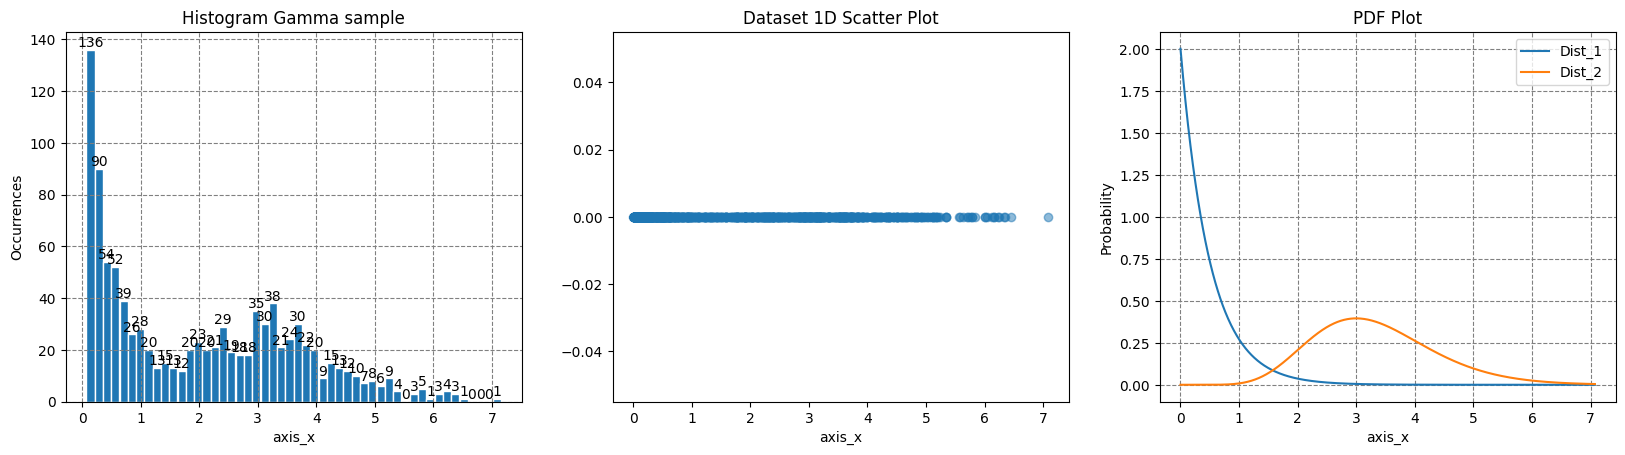

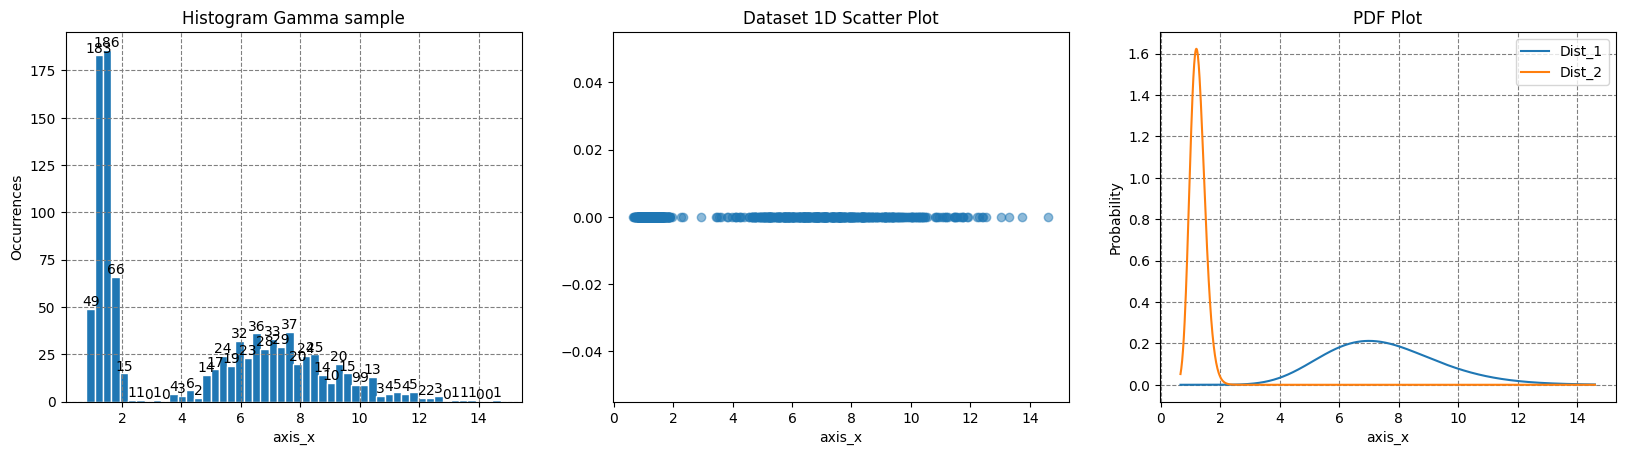

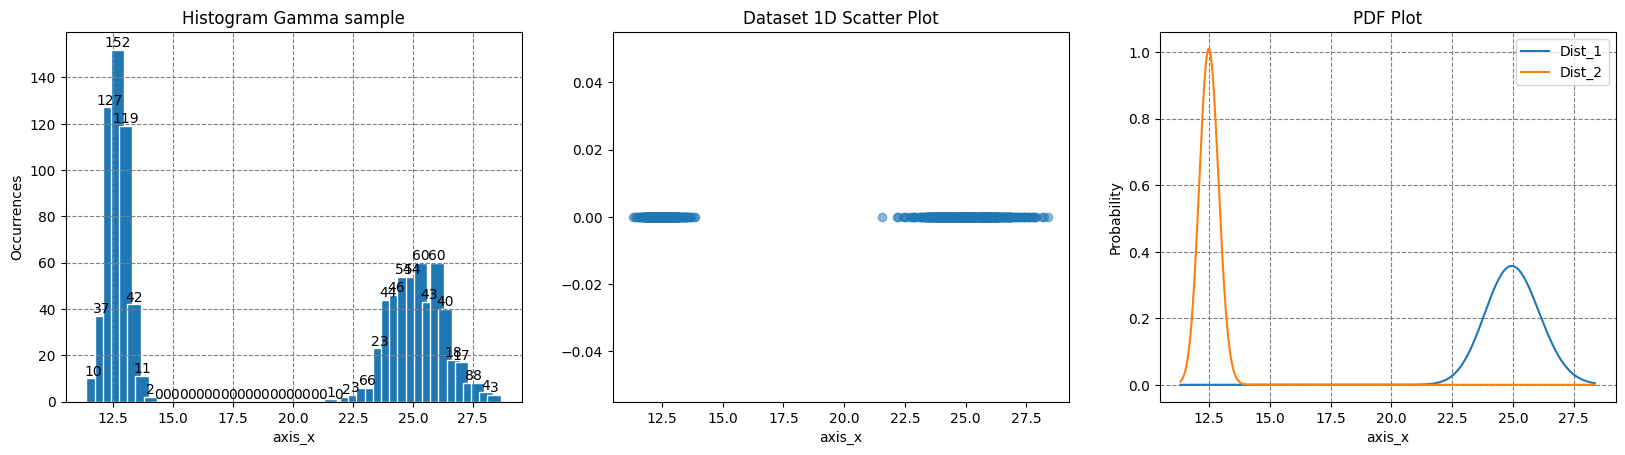

In [25]:
N = 1000

aCon   = [[1.0, 10.0],[15.0, 25.0],[500.0, 1000.0]]
aRate = [[2.0, 3.0 ],[2.0,  20.0],[20.0,  80.0  ]]
Gamma_Dataset_list = []

for i in range(3):
    Con1   = torch.tensor([aCon[i][0]])
    Rate1 = torch.tensor([aRate[i][0]])
    Con2   = torch.tensor([aCon[i][1]])
    Rate2 = torch.tensor([aRate[i][1]])
    ds_gamma, gd1, gd2 = generate_data_gamma(N,Con1,Rate1,Con2,Rate2)
    Gamma_Dataset_list.append(ds_gamma)
    plot_dataset(ds_gamma, gd1, gd2,
            "axis_x", "Occurrences", "Histogram Gamma sample",
            "axis_x", "", "Dataset 1D Scatter Plot",
            "axis_x", "Probability", "PDF Plot")

3. (10 puntos) Ejecute 5 corridas diferentes del algoritmo, donde por cada una documente los parámetros a los que se arribó, junto con los parámetros iniciales (describalo en una tabla). Hagalo para los 3 conjuntos de datos generados anteriormente.


    a) Grafique las funciones de densidad de probabilidad a las que convergió el algoritmo. Puede graficar también las funciones de densidad obtenidas en 2 o 3 pasos intermedios. Presente una tabla de gráficas donde en cada entrada se identifique el número de iteración y los parámetros iniciales.

        1) Comente los resultados

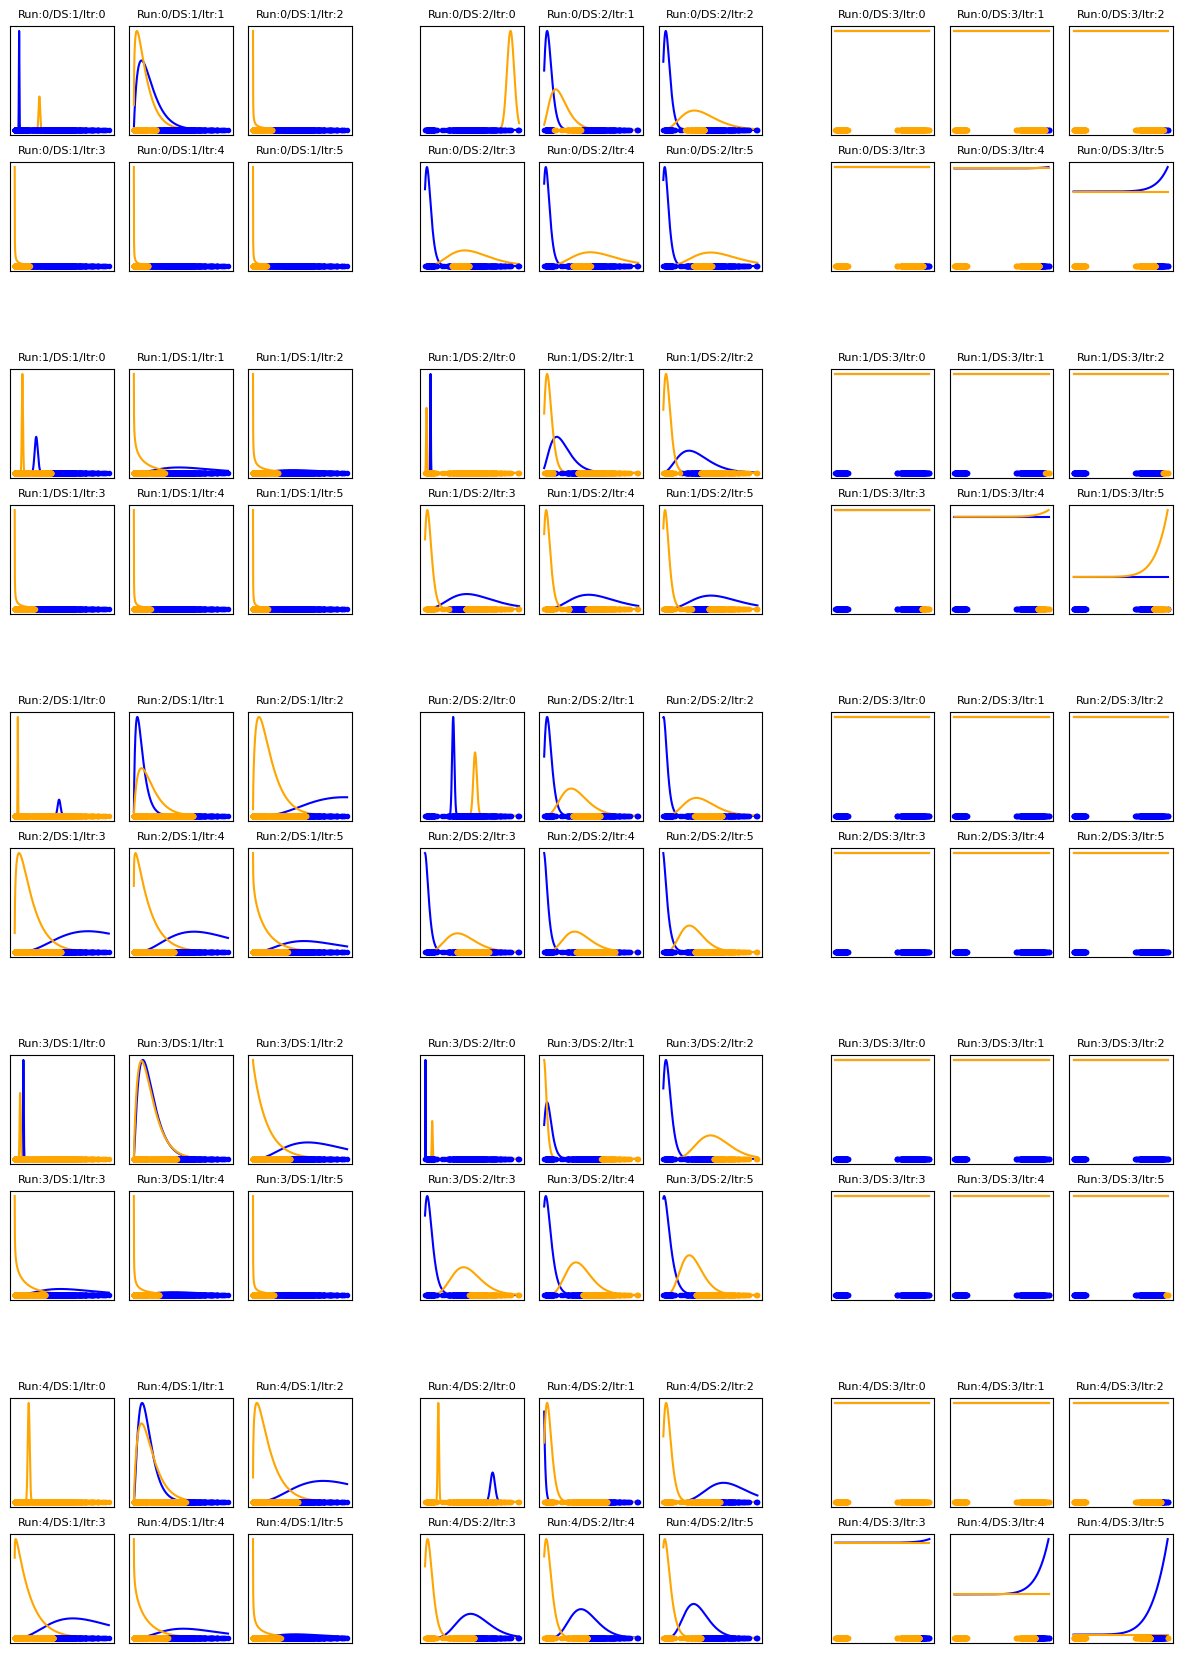

In [328]:
fig = plt.figure(figsize=(15, 21))
outer_grid = fig.add_gridspec(5, 3, wspace=0.2, hspace=0.4)

for a in range(5):
    for b in range(3):
        # gridspec inside gridspec
        inner_grid = outer_grid[a, b].subgridspec(2, 3, wspace=0.15, hspace=0.25)
        axs = inner_grid.subplots()  # Create all subplots for the inner grid.
        par_m = init_random_parameters([0,1000])
        for (c, d), ax in np.ndenumerate(axs):
            k=3*c+d
            M = calculate_membership_dataset(Gamma_Dataset_list[b], par_m)
            xmemb_1 = []
            xmemb_2 = []
            for indx, xi in enumerate(Gamma_Dataset_list[b]):
                if M[indx][0] == 1: xmemb_1.append(xi)
                else:               xmemb_2.append(xi)
            max_val = np.max(Gamma_Dataset_list[b].tolist())
            min_val = np.min(Gamma_Dataset_list[b].tolist())
            gamma_dist1 = Gamma(par_m[0][0],par_m[0][1])
            gamma_dist2 = Gamma(par_m[1][0],par_m[1][1])
            xpoints = np.arange(min_val, max_val, (max_val - min_val)/1000)
            y1 = [torch.exp(gamma_dist1.log_prob(torch.tensor(a))) for a in xpoints]
            y2 = [torch.exp(gamma_dist2.log_prob(torch.tensor(a))) for a in xpoints]
            yp1 = torch.zeros(len(xmemb_1)) - 0.0001
            yp2 = torch.zeros(len(xmemb_2)) - 0.0001
            ax.plot( xpoints,y1, label='Dist_1',color='blue')
            ax.plot( xpoints,y2, label='Dist_2',color='orange')
            if len(xmemb_1) > 0: ax.plot(xmemb_1, yp1, ".",color='blue')
            if len(xmemb_2) > 0: ax.plot(xmemb_2, yp2, ".",color='orange')
            ax.set(xticks=[], yticks=[])
            ax.set_title('Run:'+str(a)+'/'+'DS:'+str(b+1)+'/Itr:'+str(k), fontsize=8)
            
            par_m = recalculate_parameters(Gamma_Dataset_list[b], M)

for ax in fig.get_axes():
    ss = ax.get_subplotspec()

plt.show()

1. (5 puntos) Explique cual es el comportamiento esperado de utilizar la implementación del algoritmo de maximización de esperanza para una distribución Gamma, con un conjunto de datos que sigue una distribución Gaussiana y viceversa. 

    a) (10 puntos) Realice un diseño experimental donde verifique lo anterior

parameters:  tensor([[12.5278,  0.4204],
        [25.0703,  1.1174]])


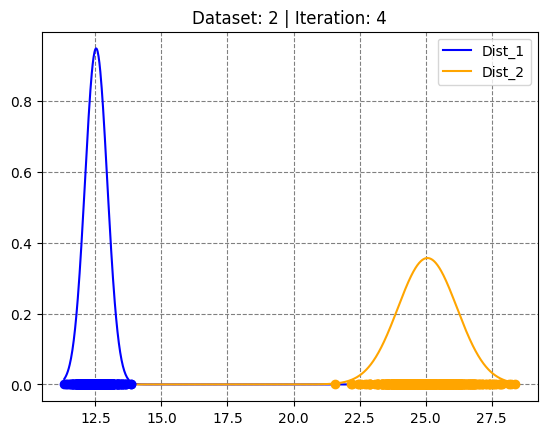

In [33]:
## Cantidad de iteraciones
P = 5

## Loop para probar el algoritmo de clustering en los 3 datasets generados
for dis_item in range(3):
    ## Se inicializa con parámetros centrado en los valores extremos
    par_m = init_parameters_extreme_values(Gamma_Dataset_list[dis_item])
    for k in range(P):
        print("parameters: ", par_m)
        ## Se calcula la membresía del dataset
        M = calculate_membership_dataset(Gamma_Dataset_list[dis_item], par_m)
        ## Se grafica la asociación de datos del dataset
        Memb_plot(Gamma_Dataset_list[dis_item], M, par_m, title='Dataset: '+str(dis_item)+' | Iteration: '+str(k))
        ## Se recalculan los parámetros basado en la membresía para la siguiente iteración 
        par_m = recalculate_parameters(Gamma_Dataset_list[dis_item], M)
        clear_output(wait=True)
        time.sleep(2)

In [39]:
def Memb_plot_gamma(ds, Memb, par_m, title):
    """
    Funsión visualizar la funcionalidad de la asociación de valores
    
    Inputs: ds  : Dataset para graficar en 1D
            Memb : Matríz de membresía
            par_m : Matríz de parámetros para generar las PDF
            title : Título de la gráfica
    Outputs: Plot mostrando dos funciones normales y el dataset con coloración de acuerdo con su membresía
    """
    ## Se separan el data set en dos listas de acuerdo a su membresía
    xmemb_1 = []
    xmemb_2 = []
    for indx, xi in enumerate(ds):
        if M[indx][0] == 1: xmemb_1.append(xi)
        else:               xmemb_2.append(xi)
    
    ## Valore extremos del dataset usados en la graficación
    max_val = np.max(ds.tolist())
    min_val = np.min(ds.tolist())
    ## Generación de las PDF gaussianas
    gamma_dist1 = Gamma(par_m[0][0],par_m[0][1])
    gamma_dist2 = Gamma(par_m[1][0],par_m[1][1])
    ## Creación del gráfico
    fig,ax = plt.subplots(nrows=1, ncols=1)
    ## Se crean 1000 puntos en el eje x entre los valores extremos del dataset
    xpoints = np.arange(0, max_val, (max_val - min_val)/1000)
    ## Se generan los puntos del eje y para las PDFs
    y1 = [torch.exp(gamma_dist1.log_prob(torch.tensor(a))) for a in xpoints]
    y2 = [torch.exp(gamma_dist2.log_prob(torch.tensor(a))) for a in xpoints]
    ## Se define el eje y para los puntos del dataset en -0.0001 (1D plot)
    yp1 = torch.zeros(len(xmemb_1)) - 0.0001
    yp2 = torch.zeros(len(xmemb_2)) - 0.0001
    ## Se generan las PDFs en el gráfico
    ax.plot( xpoints,y1, label='Dist_1',color='blue')
    ax.plot( xpoints,y2, label='Dist_2',color='orange')
    ## Se generan los puntos del dataset en el gráfico, si el conjunto de membresía es está vacío se ignora
    if len(xmemb_1) > 0: ax.plot(xmemb_1, yp1, "o",color='blue')
    if len(xmemb_2) > 0: ax.plot(xmemb_2, yp2, "o",color='orange')
    ax.grid(color='gray', linestyle='dashed')
    ax.legend()
    ax.set_title(title)
    plt.show()



parameters:  tensor([[  752.4045, 66392.1641],
        [  637.4193,   905.7880]])


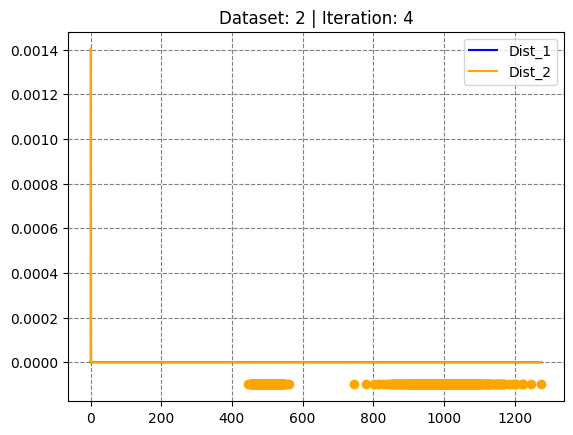

In [41]:
## Cantidad de iteraciones
P = 5

## Loop para probar el algoritmo de clustering en los 3 datasets generados
for dis_item in range(3):
    ## Se inicializa con parámetros centrado en los valores extremos
    par_m = init_random_parameters_gamma(Dataset_list[dis_item])
    for k in range(P):
        print("parameters: ", par_m)
        ## Se calcula la membresía del dataset
        M = calculate_membership_dataset_gamma(Dataset_list[dis_item], par_m)
        ## Se grafica la asociación de datos del dataset
        Memb_plot_gamma(Dataset_list[dis_item], M, par_m, title='Dataset: '+str(dis_item)+' | Iteration: '+str(k))
        ## Se recalculan los parámetros basado en la membresía para la siguiente iteración 
        par_m = recalculate_parameters_gamma(Dataset_list[dis_item], M)
        clear_output(wait=True)
        time.sleep(2)